In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

ticker = '^NSEI'  
start_date = '2005-01-01'  
end_date = '2025-12-31'    


data = yf.download(ticker, start=start_date, end=end_date)
data['Daily Return'] = data['Adj Close'].pct_change() * 100

data = data.dropna()

[*********************100%***********************]  1 of 1 completed


In [2]:
data.loc[:, 'Year'] = data.index.year
thresholds = [1, 2, 3]

down_days_by_year = {year: {f'{threshold}% Down Days': 0 for threshold in thresholds} for year in data['Year'].unique()}

def count_threshold_crossings(returns, threshold):
    crossings = 0
    below_threshold = False
    for ret in returns:
        if ret < -threshold and not below_threshold:
            crossings += 1
            below_threshold = True
        elif ret >= -threshold:
            below_threshold = False
    return crossings

for year in down_days_by_year.keys():
    yearly_data = data[data['Year'] == year]
    for threshold in thresholds:
        down_days_by_year[year][f'{threshold}% Down Days'] = count_threshold_crossings(yearly_data['Daily Return'], threshold)


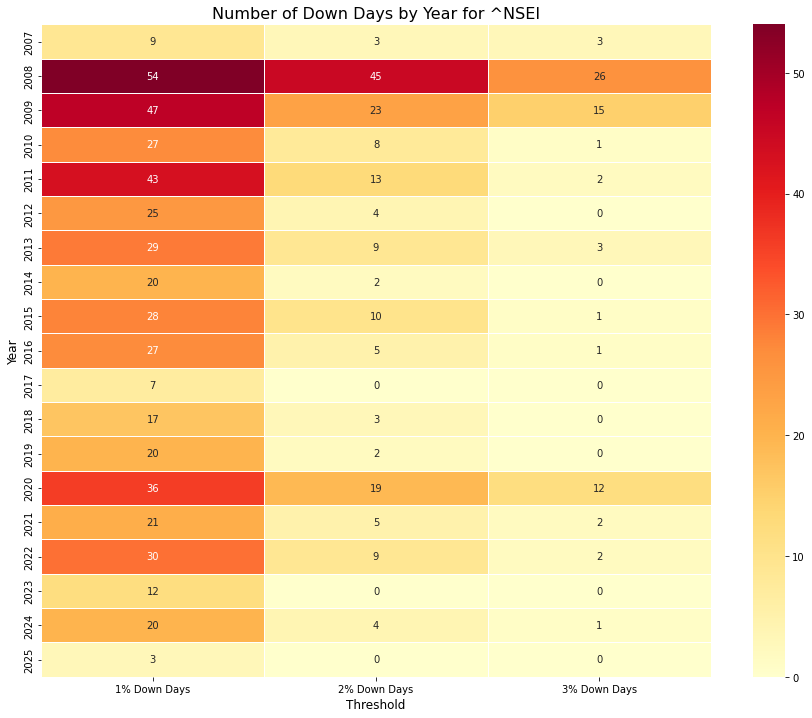

In [6]:
down_days_table = pd.DataFrame.from_dict(down_days_by_year, orient='index')
down_days_table = down_days_table.sort_index()

plt.figure(figsize=(15, 12))
sns.heatmap(down_days_table, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5)

plt.title(f'Number of Down Days by Year for {ticker}', fontsize=16)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Year', fontsize=12)


plt.show()